### N Balaji       nbalaji743@gmail.com

# prediction model for profit of 50_startups data

In [2]:
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

#R&D Spend -- Research and devolop spend in the past few years
#Administration -- spend on administration in the past few years
#Marketing Spend -- spend on Marketing in the past few years
#State -- states from which data is collected
#Profit  -- profit of each state in the past few years

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
pt=pd.read_csv('50_Startups.csv')

In [5]:
pt.shape

(50, 5)

In [6]:
pt.head()

,RnDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [21]:
# EDA

In [6]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnDSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [132]:
pt[pt.duplicated()]  
# no data is duplicated

,RnDSpend,Administration,MarketingSpend,State,Profit


In [25]:
#corerlation analysis
# correlation matrix
pt.corr()

,RnDSpend,Administration,MarketingSpend,Profit
RnDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


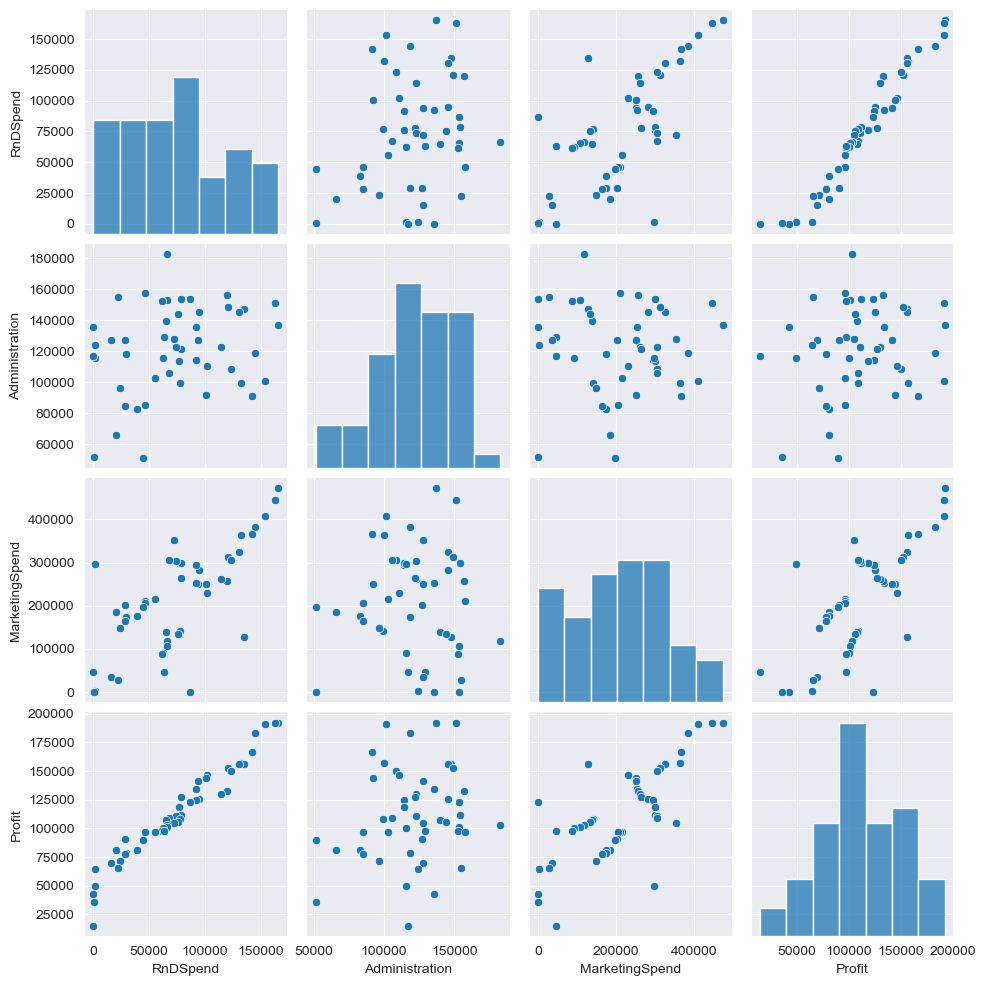

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(pt)

In [9]:
#model building
model1 = smf.ols('Profit~RnDSpend+Administration+MarketingSpend',data=pt).fit()

In [10]:
model1.params

Intercept         50122.192990
RnDSpend              0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        07:54:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnDSpend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# the administration is insignificant and hence ,
#individual linear regression models is created for Administration and Marketing spend


In [27]:
# SLR for Administration
slr_a = smf.ols('Profit~Administration',data=pt).fit()

In [28]:
slr_a.summary()
# Administartion is insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 13 Dec 2022   Prob (F-statistic):              0.162
Time:                        08:26:50   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
slr_m = smf.ols('Profit~MarketingSpend',data=pt).fit()

In [30]:
slr_m.summary()
# marketing spend has significant value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           4.38e-10
Time:                        08:28:23   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
mlr_am=smf.ols('Profit~Administration+MarketingSpend',data=pt).fit()

In [32]:
mlr_am.summary()
# both Administration and Markting spend has significant values
# but the R-squared:	0.610 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.50e-10
Time:                        08:29:54   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
MarketingSpend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# validating model
# two techniques  1.VIF   2. Residual analysis
#1.Vif
rsq_Administration = smf.ols('Administration~RnDSpend+MarketingSpend',data=pt).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)

rsq_RnDSpend = smf.ols('RnDSpend~Administration+MarketingSpend',data=pt).fit().rsquared  
vif_RnDSpend = 1/(1-rsq_RnDSpend)

rsq_MarketingSpend = smf.ols('MarketingSpend~RnDSpend+Administration',data=pt).fit().rsquared  
vif_MarketingSpend = 1/(1-rsq_MarketingSpend)

# Storing vif values in a data frame
d1 = {'Variables':['Administration','RnDSpend','MarketingSpend'],'VIF':[vif_Administration,vif_RnDSpend,vif_MarketingSpend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Administration,1.175091
1,RnDSpend,2.468903
2,MarketingSpend,2.326773


In [36]:
# all the VIF values are less than 20 and hence all the variables are taken into consideration

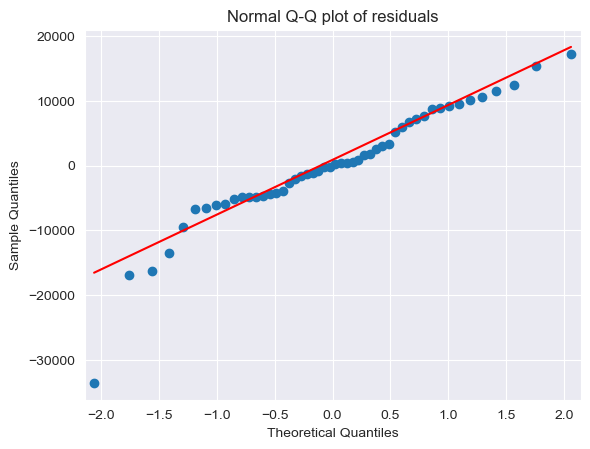

In [37]:
## 2. Residual analysis
#Test for Normality of Residuals (Q-Q Plot)
qqplot=sm.qqplot(model.resid,line='q') # line ='q'  is the 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [83]:
list(np.where(model.resid<-20000))
# the index no 49 is to be taken into consideration

[array([49], dtype=int64)]

In [133]:
#Residual Plot for Homoscedasticity or hetroscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  # ei vs fitted values

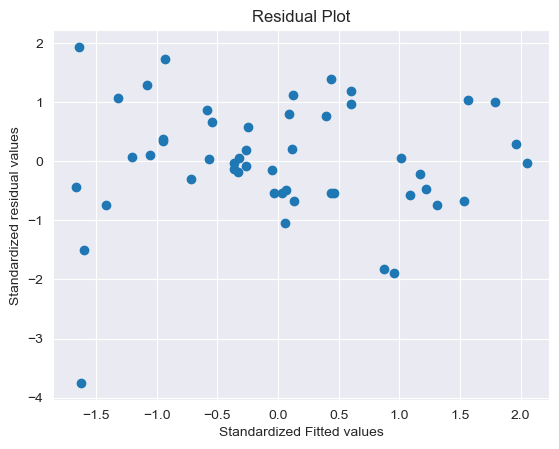

In [41]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()
# no pattern and hence no problems

eval_env: 1


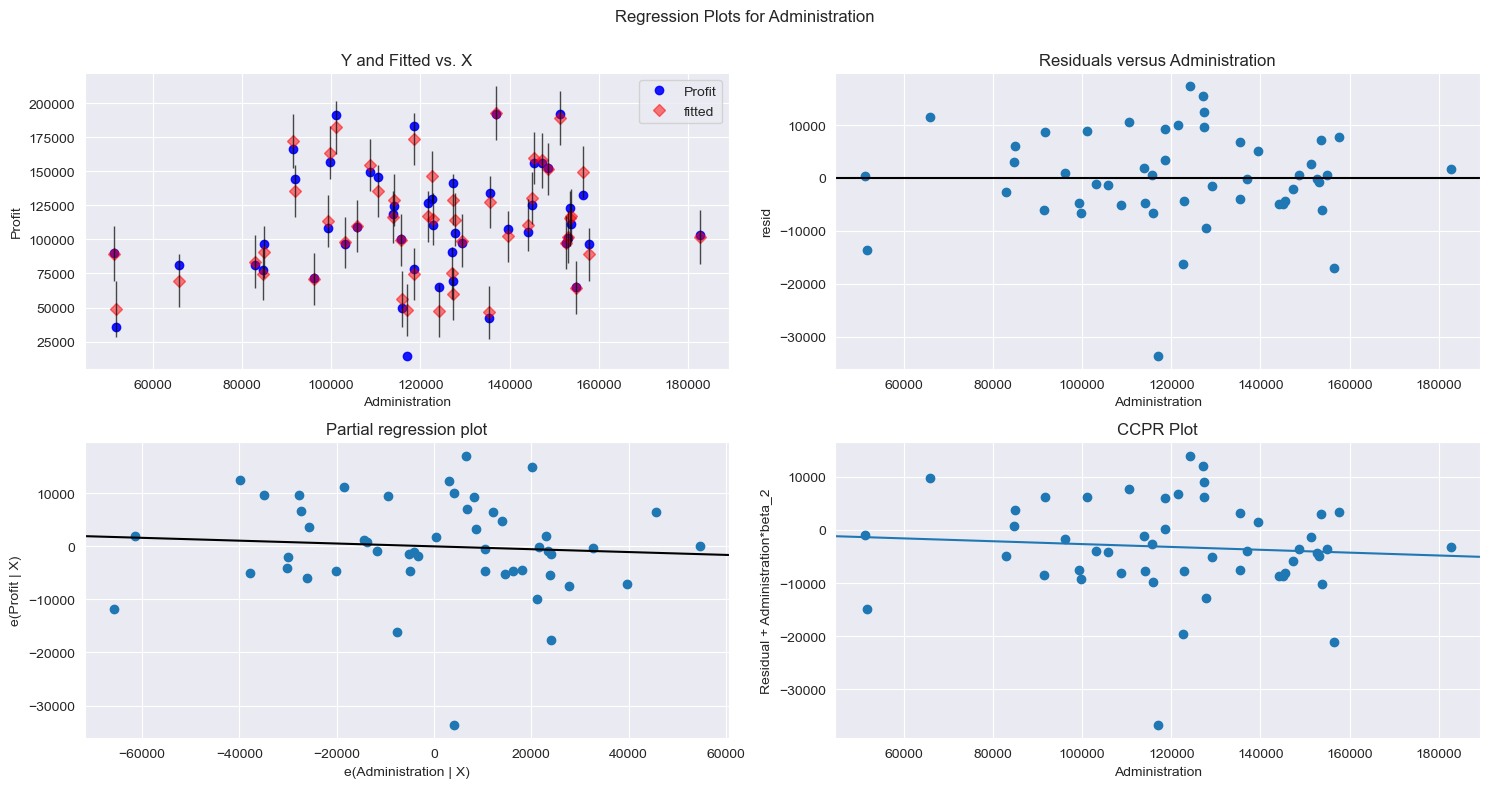

In [42]:
# regressor vs Residuals
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


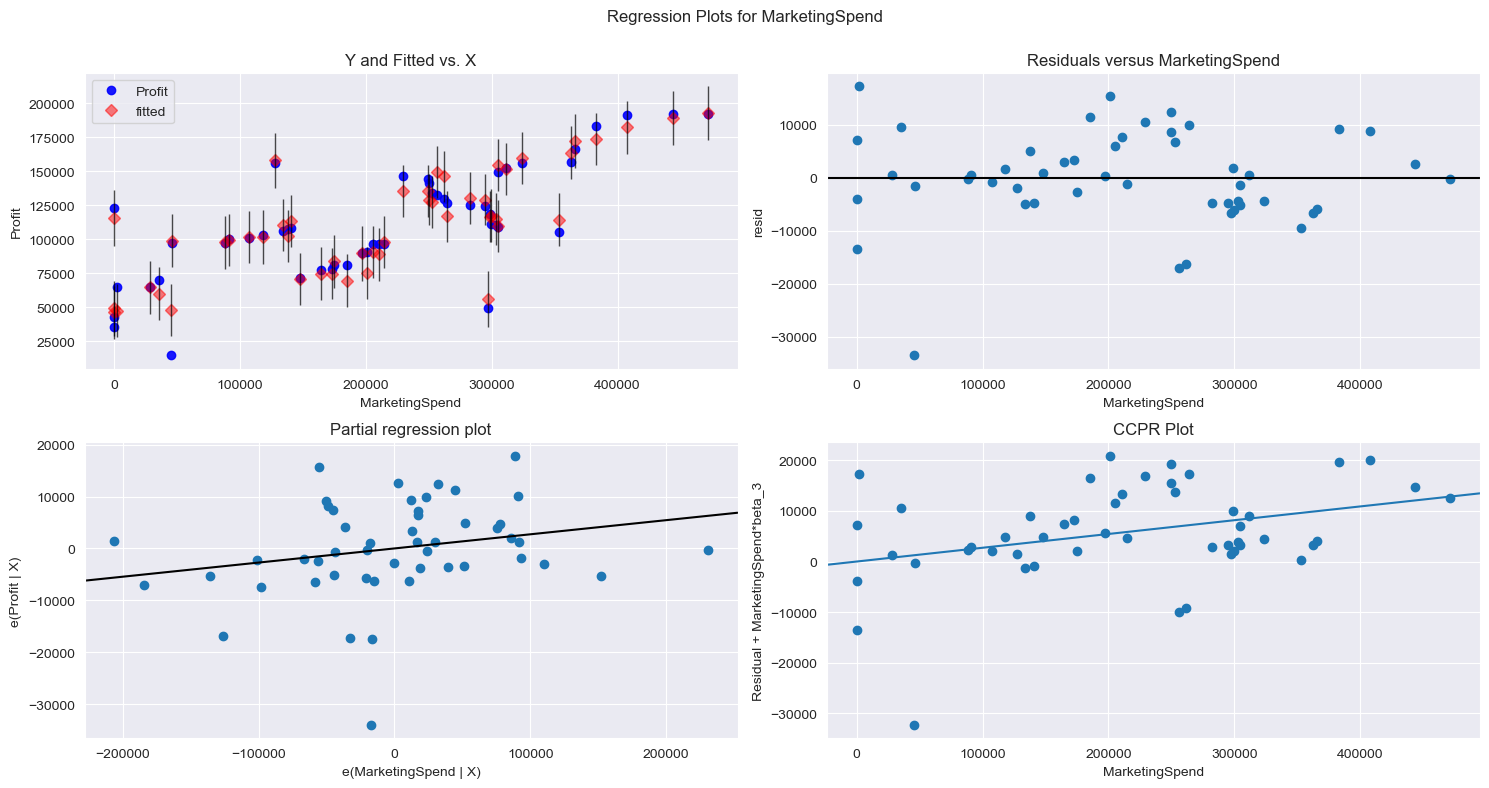

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

eval_env: 1


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

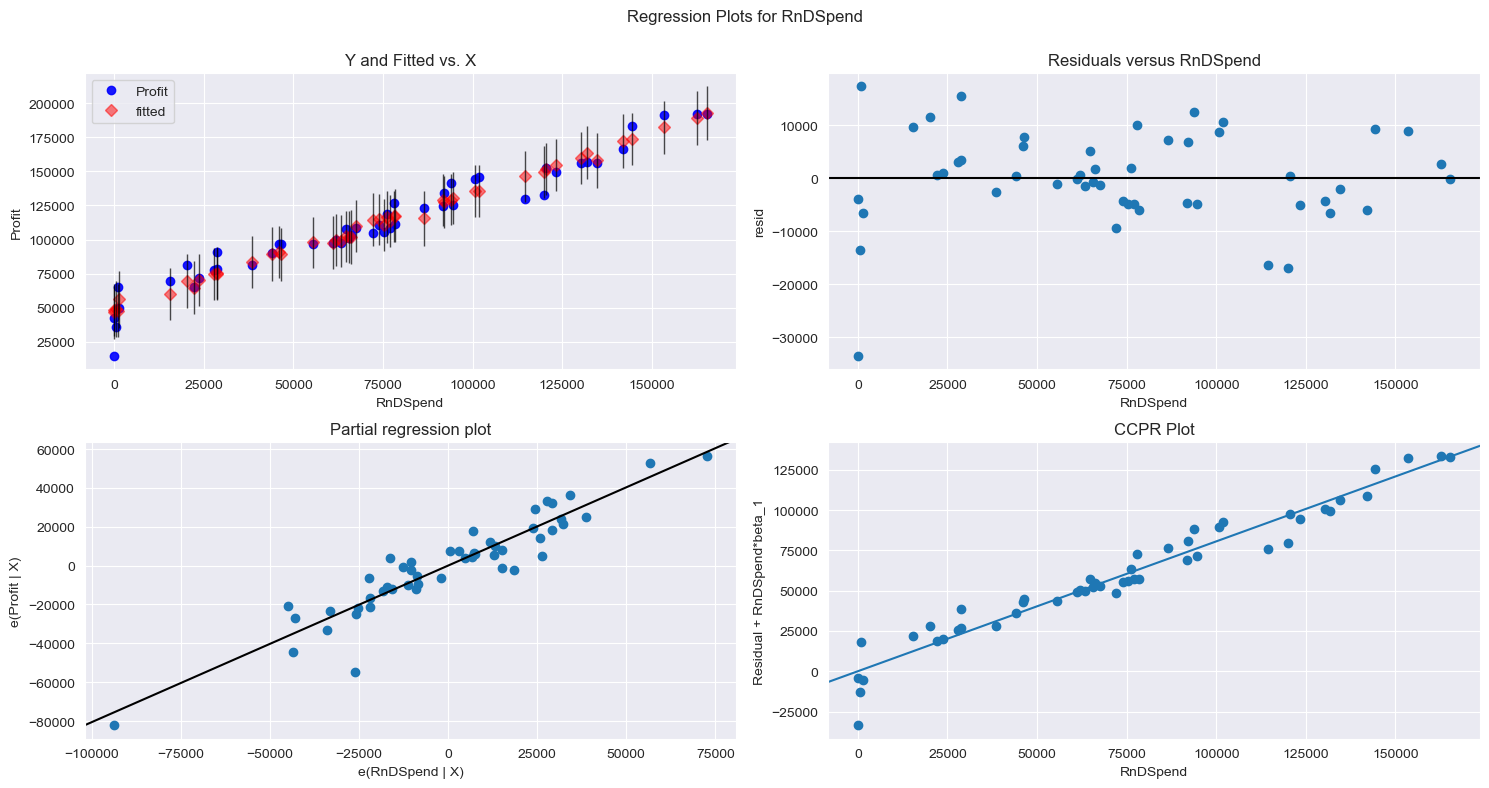

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnDSpend", fig=fig)
plt.show()

In [48]:
#model deletion diagonistics 
#detection of outliers/influencres
#cooks distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance 

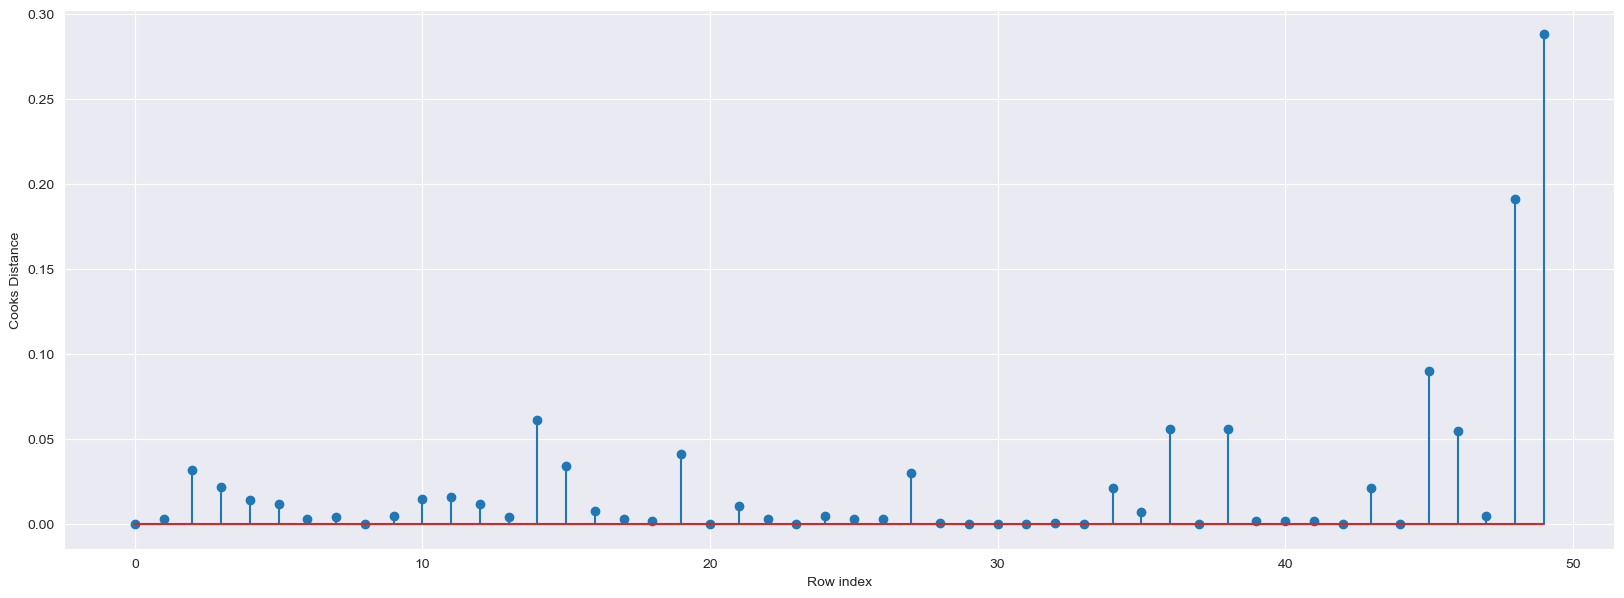

In [51]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(pt)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

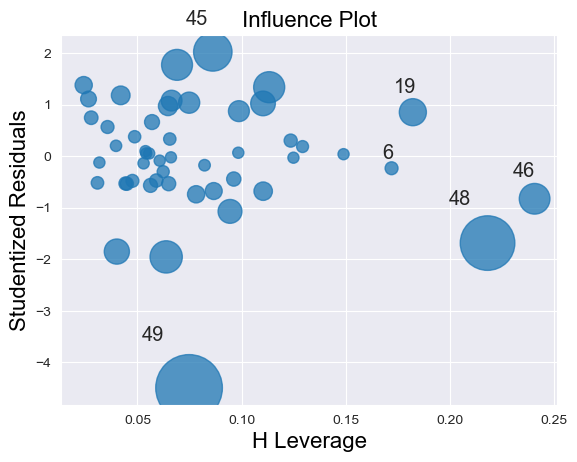

In [54]:
#high influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [55]:
k = pt.shape[1]
n = pt.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


0.36

In [58]:
#from the above plot it is evident that the value 49 is the influencer
pt[pt.index.isin([49])]

,RnDSpend,Administration,MarketingSpend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [87]:
#imporoving the model
pt_new=pd.read_csv('50_Startups.csv')

In [88]:
pt_new.head()

,RnDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [89]:
pt1=pt_new.drop(pt_new.index[[49]],axis=0).reset_index()

In [90]:
#Drop the original index
pt1=pt1.drop(['index'],axis=1)

In [91]:
pt1

,RnDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [92]:
#model building
model2 = smf.ols('Profit~RnDSpend+Administration+MarketingSpend',data=pt1).fit()

In [80]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     347.6
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           3.70e-30
Time:                        09:41:35   Log-Likelihood:                -482.84
No. Observations:                  47   AIC:                             973.7
Df Residuals:                      43   BIC:                             981.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.954e+04   5907.852     10.079      0.000    4.76e+04    7.15e+04
RnDSpend           0.7846      0.036     21.512      0.000       0.711       0.858
Administration    -0.0596      0.044     -1.358      0.182      -0.148       0.029
MarketingSpend     0.0153      0.014      1.131      0.264      -0.012       0.043
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.448
Skew:                           0.043   Prob(JB):                        0.799
Kurtosis:                       2.530   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
#final model is model2
(model2.rsquared,model2.aic)

(0.9613162435129847, 1020.5652974526367)

In [131]:
#model predictions
#x=input("enter the R&D spend:")
#y=input("enter the Administration spend :")
#z=input("enter the Marketing spend:")
new_data=pd.DataFrame({'RnDSpend':150000,'Administration':100000,'MarketingSpend':400000},index=[1])
new_data

,RnDSpend,Administration,MarketingSpend
1,150000,100000,400000


In [123]:
model2.predict(new_data)

1    177706.033198
dtype: float64

In [124]:
model2.predict(pt1.iloc[0:5,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
dtype: float64